# Module 5 Assignment 2 - Company Bankruptcy Prediction (Kaggle)

**Reed Ballesteros**

**MSDS-422**

**5/1/2022**

**Instructor: Prof. Noah Gift**

## Management/Research Question
In layman’s terms, what is the management/research question of interest, and why would anyone care?  

## Requirements
- Conduct your analysis using a cross-validation design.
- Conduct / improve upon previous EDA.
- Build the following models at a minimum.
    - Random Forest Classifier
    - Gradient Boosted Trees
    - Extra Trees
- Conduct hyperparameter tuning for the following at a minimum.
    - n_estimators (number of trees)
    - max_features (maximum features considered for splitting a node)
    - max_depth (maximum number of levels in each tree)
    - splitting criteria (entropy or gini)
- Compare your models using the F1-Score on a 20% validation set.
- Generate predictions from your models, and submit at least two models to Kaggle.com for evaluation. Provide your Kaggle.com user name and a screen snapshot of your scores.

## Company Bankruptcy Prediction

Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009

https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

#### Context

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

#### Attribute Information

Version 2: Updated column names and description to make the data easier to understand (Y = Output feature, X = Input features)

- Y - Bankrupt?: Class label
- X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)
- X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)
- X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)
- X4 - Operating Gross Margin: Gross Profit/Net Sales
- X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales
- X6 - Operating Profit Rate: Operating Income/Net Sales
- X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales
- X8 - After-tax net Interest Rate: Net Income/Net Sales
- X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio
- X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales
- X11 - Operating Expense Rate: Operating Expenses/Net Sales
- X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales
- X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities
- X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity
- X15 - Tax rate (A): Effective Tax Rate
- X16 - Net Value Per Share (B): Book Value Per Share(B)
- X17 - Net Value Per Share (A): Book Value Per Share(A)
- X18 - Net Value Per Share (C): Book Value Per Share(C)
- X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income
- X20 - Cash Flow Per Share
- X21 - Revenue Per Share (Yuan ¥): Sales Per Share
- X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share
- X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share
- X24 - Realized Sales Gross Profit Growth Rate
- X25 - Operating Profit Growth Rate: Operating Income Growth
- X26 - After-tax Net Profit Growth Rate: Net Income Growth
- X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth
- X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth
- X29 - Total Asset Growth Rate: Total Asset Growth
- X30 - Net Value Growth Rate: Total Equity Growth
- X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth
- X32 - Cash Reinvestment %: Cash Reinvestment Ratio
- X33 - Current Ratio
- X34 - Quick Ratio: Acid Test
- X35 - Interest Expense Ratio: Interest Expenses/Total Revenue
- X36 - Total debt/Total net worth: Total Liability/Equity Ratio
- X37 - Debt ratio %: Liability/Total Assets
- X38 - Net worth/Assets: Equity/Total Assets
- X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets
- X40 - Borrowing dependency: Cost of Interest-bearing Debt
- X41 - Contingent liabilities/Net worth: Contingent Liability/Equity
- X42 - Operating profit/Paid-in capital: Operating Income/Capital
- X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital
- X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity
- X45 - Total Asset Turnover
- X46 - Accounts Receivable Turnover
- X47 - Average Collection Days: Days Receivable Outstanding
- X48 - Inventory Turnover Rate (times)
- X49 - Fixed Assets Turnover Frequency
- X50 - Net Worth Turnover Rate (times): Equity Turnover
- X51 - Revenue per person: Sales Per Employee
- X52 - Operating profit per person: Operation Income Per Employee
- X53 - Allocation rate per person: Fixed Assets Per Employee
- X54 - Working Capital to Total Assets
- X55 - Quick Assets/Total Assets
- X56 - Current Assets/Total Assets

#### Source
Deron Liang and Chih-Fong Tsai, deronliang '@' gmail.com; cftsai '@' mgt.ncu.edu.tw, National Central University, Taiwan
The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction

#### Relevant Papers
Liang, D., Lu, C.-C., Tsai, C.-F., and Shih, G.-A. (2016) Financial Ratios and Corporate Governance Indicators in Bankruptcy Prediction: A Comprehensive Study. European Journal of Operational Research, vol. 252, no. 2, pp. 561-572.
https://www.sciencedirect.com/science/article/pii/S0377221716000412

### Libraries to be loaded:

In [144]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingRegressor
import xgboost as xgb



## INGEST

In [145]:
train_df = pd.read_csv("data.csv")
train_df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [146]:
train_df.shape

(6819, 96)

In [147]:
train_df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


## EDA

Get dataframe information:

In [148]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

There are no null values.

In [149]:
train_df.isna().sum().sum()

0

All 96 variables are quantitative variables.

In [150]:
qual_cols = [f for f in train_df.columns if train_df.dtypes[f] == 'object']
len(qual_cols)


0

In [151]:
quant_cols = [f for f in train_df.columns if train_df.dtypes[f] != 'object']
len(quant_cols)

96

There are 6819 rows in the dataset.

In [152]:
len(train_df['Bankrupt?'])

6819

In [153]:
quant_cols.remove('Bankrupt?')

**Let's plot a histogram of the variables.**

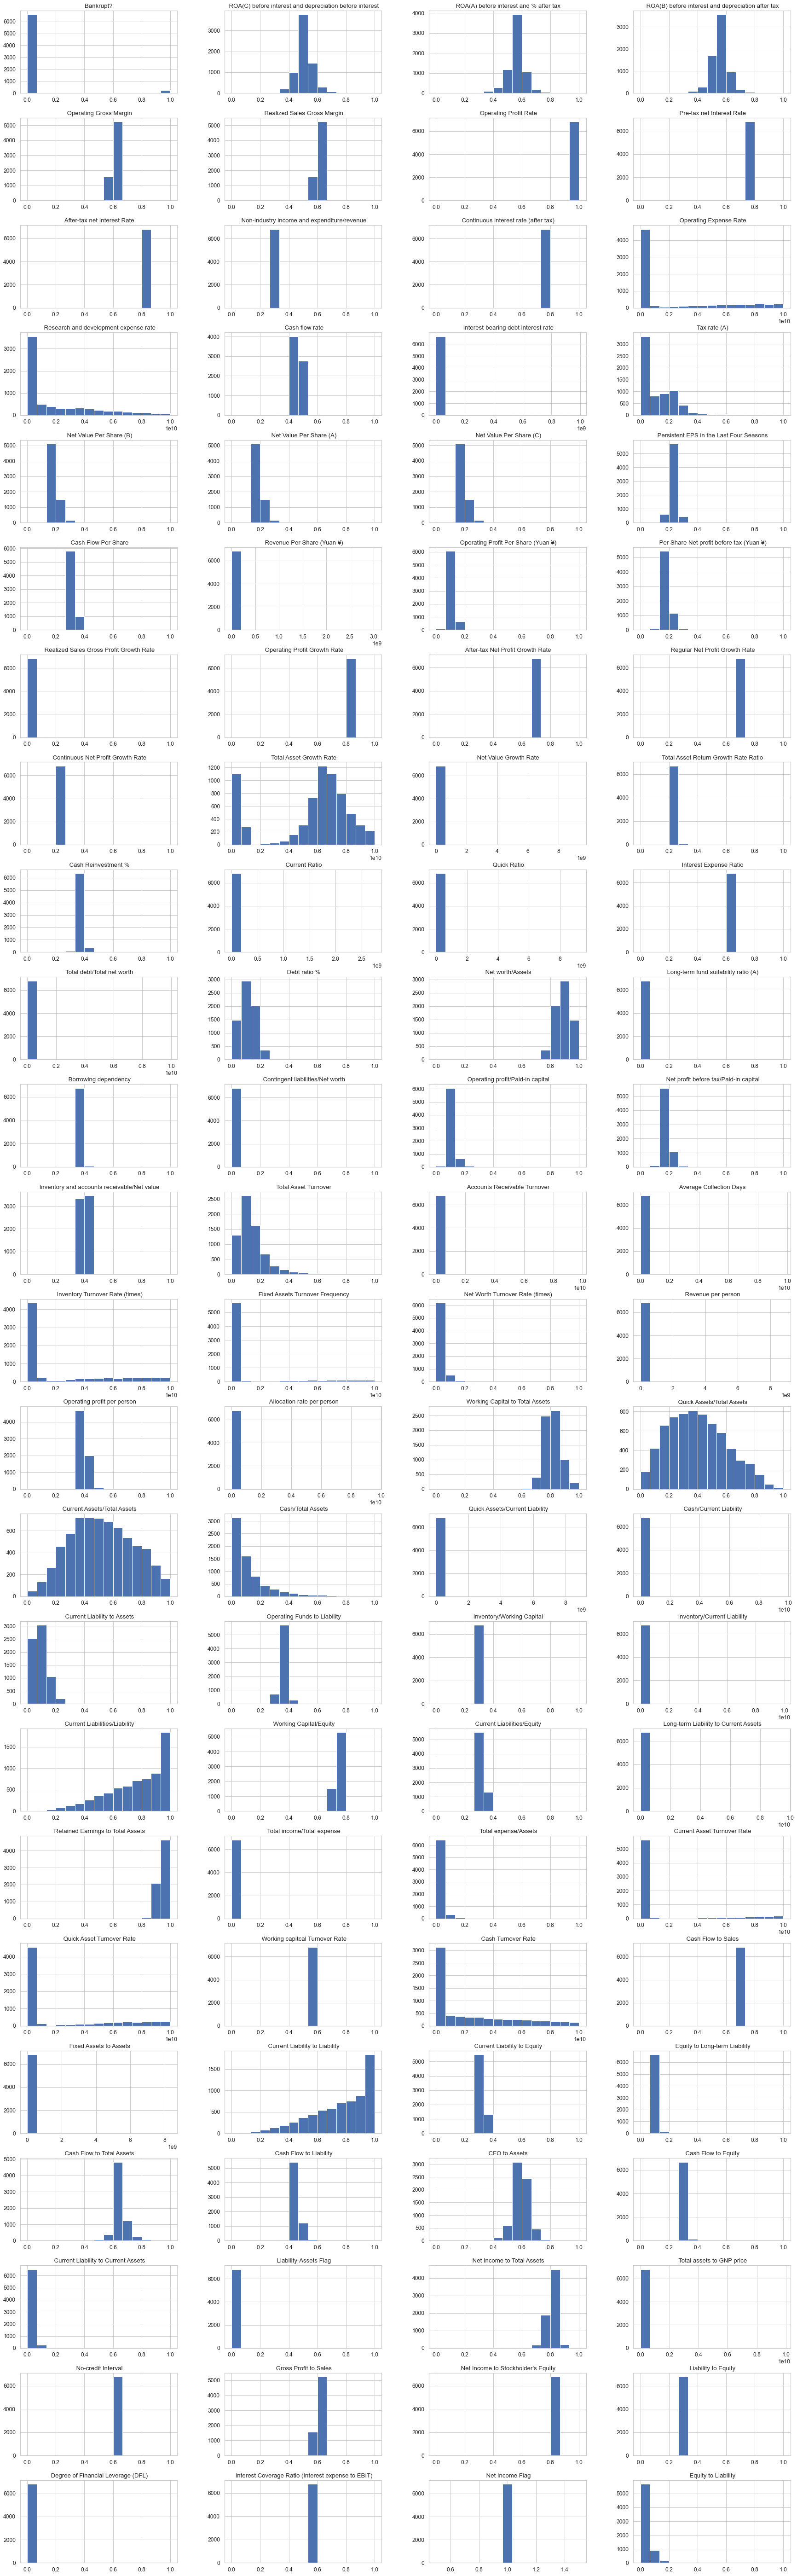

In [154]:
sns.set(style='whitegrid', font_scale=1.1, rc={'figure.figsize': [30, 102]})
train_df[train_df.columns].hist(bins=15, layout=(24, 4));

**Let's create a correlation heatmap.**

<AxesSubplot:>

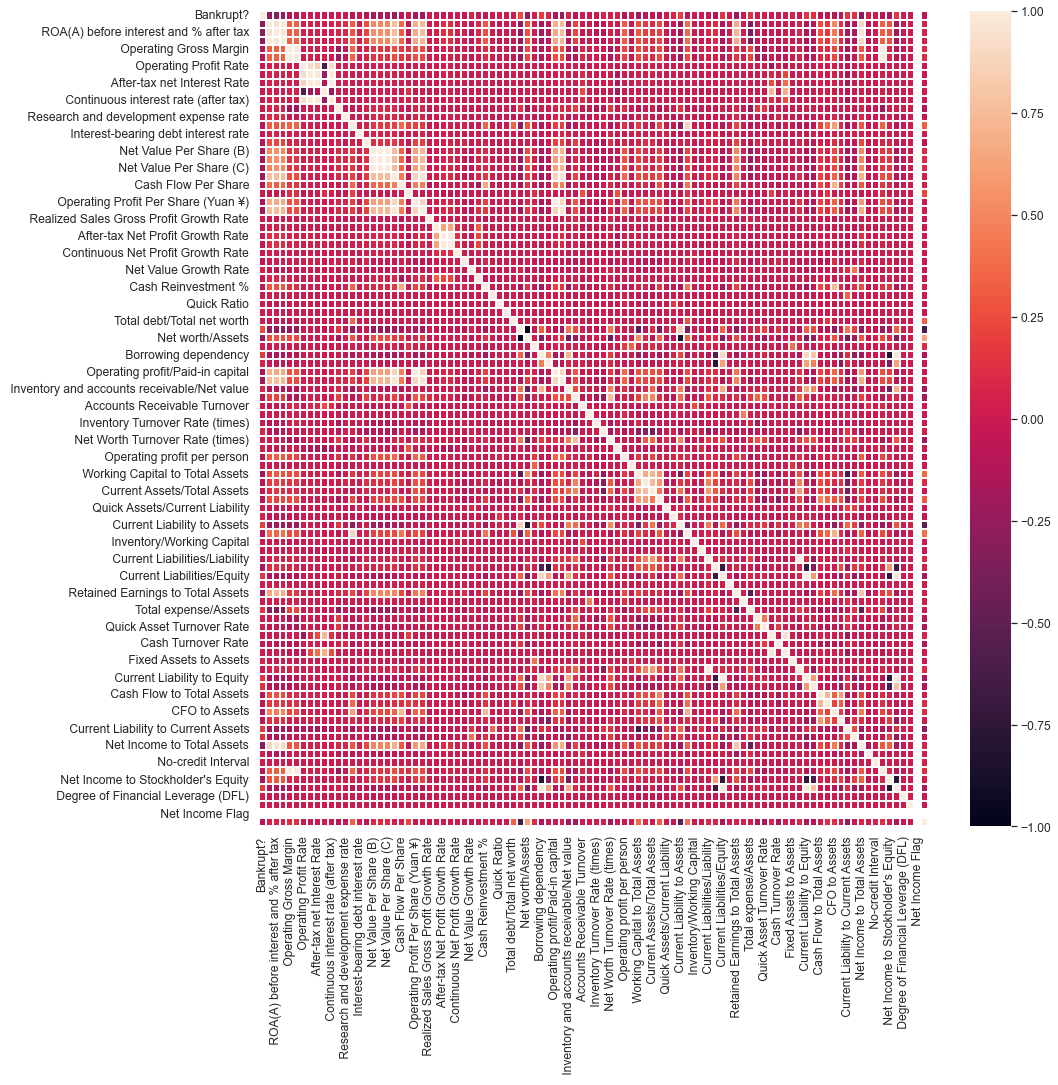

In [155]:
correlation = train_df.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlation, ax = ax, linewidth = 0.1)

**Just over three percent of the data contain rows listed as 'Bankrupt?' (the dependent variable) = 1.**

**Can we mitigate the overwhelming 'Bankrupt?' = 0 bias using some oversampling methodology...?**

In [156]:
total_bankrupt = train_df['Bankrupt?'].sum()
pct_bankrput = total_bankrupt/len(train_df['Bankrupt?'])*100
print('Num bankrupt: %d, %% of sample: %.2f%%' %(total_bankrupt, pct_bankrput))

Num bankrupt: 220, % of sample: 3.23%


<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

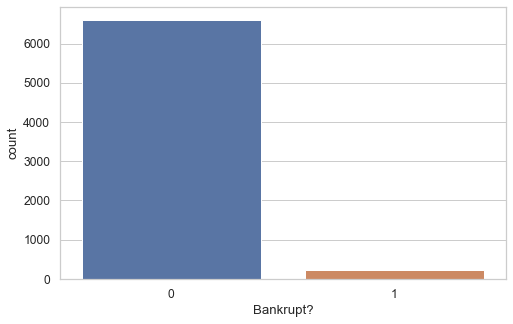

In [157]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.countplot(x='Bankrupt?', data=train_df)

**Let's make a copy of the training data separated between the dependant variable ('Bankrupt?') and the independent variables.**

In [158]:
train_df_X = train_df.copy()
train_df_y = train_df_X['Bankrupt?']
train_df_X.drop(['Bankrupt?'], axis=1, inplace=True)

In [159]:
train_df_X.shape

(6819, 95)

In [160]:
train_df_y.shape

(6819,)

**- Split the training set into an 80% training and 20% validation set.**

In [161]:
X_train,X_val,y_train,y_val=train_test_split(train_df_X,train_df_y,test_size=0.2,random_state=42)

## Oversampling

**We have the data between 'Bankrupt?' and not 'Bankrupt?' now even using SMOTE oversampling.**

In [162]:
oversample = SMOTE()
X_train,y_train=oversample.fit_resample(X_train,y_train)

In [163]:
total_bankrupt = y_train.sum()
pct_bankrput = total_bankrupt/len(train_df_y)*100
print('Num bankrupt: %d, %% of sample: %.2f%%' %(total_bankrupt, pct_bankrput))

Num bankrupt: 5286, % of sample: 77.52%


<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

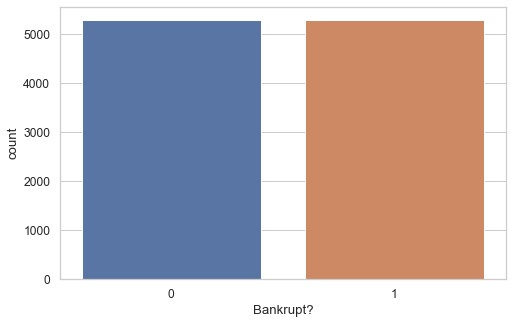

In [164]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.countplot(x=y_train)

# MODELING

In [165]:
# set up a KFold cross-validation rule
K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)

# Random Forest Classifier

In [166]:
%%time
# RandomForestClassifier: n_estimators, max_features, max_depth, criterion
rfc_grid = {'n_estimators': [200, 500],
            'max_leaf_nodes': [10, 16],
            'criterion': ['entropy', 'gini'],
            'max_features': ['log2', 'sqrt']}
rfc_cv = GridSearchCV(RandomForestClassifier(random_state=42),
            cv=kf, 
            param_grid=rfc_grid, 
            scoring='r2')
rfc_results = rfc_cv.fit(X_train, y_train)
print("RFC best score", rfc_results.best_score_)
print("RFC best params", rfc_results.best_params_)

RFC best score 0.7170475731426957
RFC best params {'criterion': 'entropy', 'max_features': 'sqrt', 'max_leaf_nodes': 16, 'n_estimators': 200}
Wall time: 19min 11s


In [168]:
%%time
rfc_n_estimators = rfc_results.best_params_['n_estimators']
rfc_max_leaf_nodes = rfc_results.best_params_['max_leaf_nodes']
rfc_criterion = rfc_results.best_params_['criterion']
rfc_max_features = rfc_results.best_params_['max_features']

score = cross_val_score(RandomForestClassifier(
            n_estimators=rfc_n_estimators, 
            max_leaf_nodes=rfc_max_leaf_nodes, 
            criterion=rfc_criterion, 
            max_features=rfc_max_features, 
            random_state=42),
            X_train, y_train, cv=kf)
print(f'Scores for each fold: {score}')
print("Accuracy: %0.4f (+/- %0.4f)" % (score.mean(), score.std() * 2))

Scores for each fold: [0.92249527 0.91398866 0.92904447 0.94039735 0.93661306 0.92620624
 0.92526017 0.93755913 0.92904447 0.93282876]
Accuracy: 0.9293 (+/- 0.0150)
Wall time: 1min 3s


In [169]:
%%time
rfc_model = RandomForestClassifier(
            n_estimators=rfc_n_estimators, 
            max_leaf_nodes=rfc_max_leaf_nodes, 
            criterion=rfc_criterion, 
            max_features=rfc_max_features, 
            random_state=42)
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
print('confusion matrix:\n',cm)
print('accuracy score = ',accuracy_score(y_val,y_pred))
print("Classification Report:\n",classification_report(y_val,y_pred))

confusion matrix:
 [[1174  139]
 [   8   43]]
accuracy score =  0.8922287390029325
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      1313
           1       0.24      0.84      0.37        51

    accuracy                           0.89      1364
   macro avg       0.61      0.87      0.66      1364
weighted avg       0.96      0.89      0.92      1364

Wall time: 6.87 s


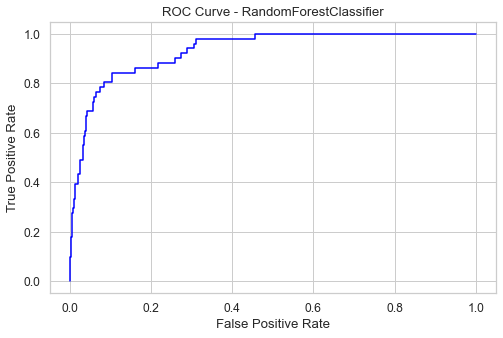

In [170]:
#define metrics
y_pred_proba = rfc_model.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, color="blue")
plt.title('ROC Curve - RandomForestClassifier')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

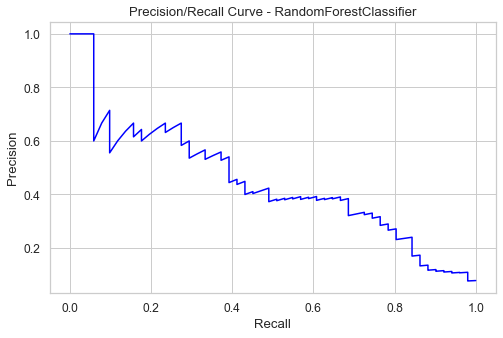

In [171]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='blue')

#add axis labels to plot
ax.set_title('Precision/Recall Curve - RandomForestClassifier')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [184]:
f_importances = pd.Series(np.round(rfc_model.feature_importances_,4),index=X_train.columns).sort_values(ascending=False)
f_importances

 After-tax net Interest Rate                                0.0880
 Net Income to Total Assets                                 0.0697
 Total debt/Total net worth                                 0.0585
 Persistent EPS in the Last Four Seasons                    0.0485
 Retained Earnings to Total Assets                          0.0480
 Continuous interest rate (after tax)                       0.0448
 Net Income to Stockholder's Equity                         0.0441
 Pre-tax net Interest Rate                                  0.0423
 Total income/Total expense                                 0.0406
 Borrowing dependency                                       0.0383
 Net profit before tax/Paid-in capital                      0.0338
 ROA(A) before interest and % after tax                     0.0323
 Liability to Equity                                        0.0306
 Per Share Net profit before tax (Yuan ¥)                   0.0296
 Net worth/Assets                                           0.

# Gradient Boosted Trees

In [176]:
%%time
# GradientBoostingClassifier hypertuning: n_estimators, max_depth, learning_rate
gbc_grid = {'n_estimators': [200, 300],
            'max_depth': [10, 15],
            'learning_rate': [0.5],
            'criterion': ['friedman_mse','squared_error'],
            'max_features': ['log2', 'sqrt']}
gbc_cv = GridSearchCV(GradientBoostingClassifier(random_state=42), 
            param_grid=gbc_grid, 
            cv=kf, 
            scoring='r2')
gbc_results = gbc_cv.fit(X_train, y_train)
print("GBR best score", gbc_results.best_score_)
print("GBR best params", gbc_results.best_params_)

GBR best score 0.9568218565454817
GBR best params {'criterion': 'squared_error', 'learning_rate': 0.5, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Wall time: 12min 23s


In [89]:
%%time
gbc_n_estimators = gbc_results.best_params_['n_estimators']
gbc_max_depth = gbc_results.best_params_['max_depth']
gbc_learning_rate = gbc_results.best_params_['learning_rate']
gbc_criterion = gbc_results.best_params_['criterion']
gbc_max_features = gbc_results.best_params_['max_features']

score = cross_val_score(GradientBoostingClassifier(
            n_estimators=gbc_n_estimators, 
            max_depth=gbc_max_depth, 
            learning_rate=gbc_learning_rate, 
            max_features='log2', 
            random_state=42),
            X_train, y_train, cv=kf)
print(f'Scores for each fold: {score}')
print("Accuracy: %0.4f (+/- %0.4f)" % (score.mean(), score.std() * 2))

Scores for each fold: [0.98204159 0.98771267 0.98770104 0.98486282 0.98675497 0.98864711
 0.99810785 0.99053926 0.98675497 0.98486282]
Accuracy: 0.9878 (+/- 0.0082)
Wall time: 38.3 s


In [177]:
# hypertune n_estimators via early stopping
gbc_model = GradientBoostingClassifier(
            n_estimators=gbc_n_estimators, 
            max_depth=gbc_max_depth, 
            learning_rate=gbc_learning_rate, 
            max_features='log2', 
            random_state=42)
gbc_model.fit(X_train, y_train)
y_pred = gbc_model.predict(X_val)

In [178]:
errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbc_model.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1
bst_n_estimators

74

In [179]:
%%time
gbc_best = GradientBoostingClassifier(
            n_estimators=bst_n_estimators, 
            max_depth=gbc_max_depth, 
            learning_rate=gbc_learning_rate, 
            max_features='log2', 
            random_state=42)
gbc_best.fit(X_train, y_train)

y_pred = gbc_best.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
print('confusion matrix:\n',cm)
print('accuracy score = ',accuracy_score(y_val,y_pred))
print("Classification Report:\n",classification_report(y_val,y_pred))

confusion matrix:
 [[1283   30]
 [  24   27]]
accuracy score =  0.9604105571847508
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1313
           1       0.47      0.53      0.50        51

    accuracy                           0.96      1364
   macro avg       0.73      0.75      0.74      1364
weighted avg       0.96      0.96      0.96      1364

Wall time: 3.95 s


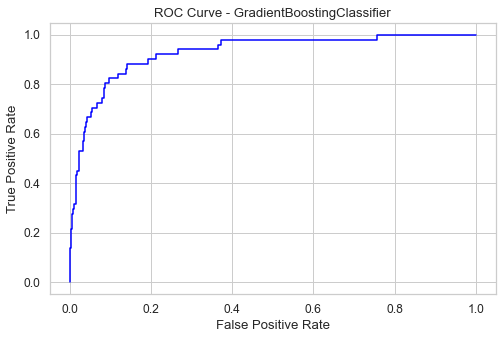

In [180]:
#define metrics
y_pred_proba = gbc_best.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, color="blue")
plt.title('ROC Curve - GradientBoostingClassifier')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

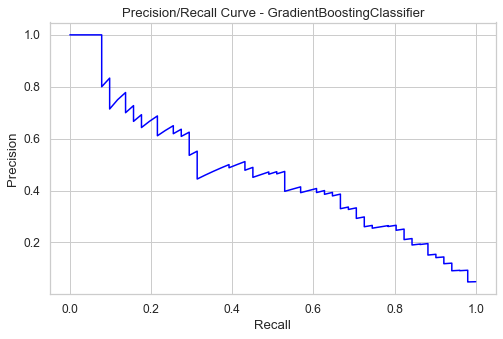

In [181]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='blue')

#add axis labels to plot
ax.set_title('Precision/Recall Curve - GradientBoostingClassifier')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [183]:
f_importances = pd.Series(np.round(gbc_best.feature_importances_,4),index=X_train.columns).sort_values(ascending=False)
f_importances

 ROA(A) before interest and % after tax                     0.3032
 Current Liability to Equity                                0.0756
 Operating Profit Per Share (Yuan ¥)                        0.0549
 ROA(B) before interest and depreciation after tax          0.0381
 Cash Turnover Rate                                         0.0356
 Debt ratio %                                               0.0310
 Non-industry income and expenditure/revenue                0.0255
 Current Assets/Total Assets                                0.0238
 Retained Earnings to Total Assets                          0.0230
 Net Income to Total Assets                                 0.0152
 ROA(C) before interest and depreciation before interest    0.0148
 Total debt/Total net worth                                 0.0144
 Long-term Liability to Current Assets                      0.0132
 Continuous interest rate (after tax)                       0.0120
 Interest-bearing debt interest rate                        0.

# Gradient Boosted Trees Alternative - Extreme Gradient Boosted Trees

In [185]:
%%time
# XBGClassifier hypertuning: n_estimators, max_depth, learning_rate
xgb_grid = {'n_estimators': [100, 200, 300],
            'max_depth': [10, 15],
            'learning_rate': [0.5]}
xgb_cv = GridSearchCV(xgb.XGBClassifier(random_state=42), cv=kf, param_grid=xgb_grid, scoring='r2')
xgb_results = xgb_cv.fit(X_train, y_train)
print("XGB best score", xgb_results.best_score_)
print("XGB best params", xgb_results.best_params_)

XGB best score 0.9549194302734432
XGB best params {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 300}
Wall time: 3min 26s


In [186]:
%%time
xgb_n_estimators = xgb_results.best_params_['n_estimators']
xgb_max_depth = xgb_results.best_params_['max_depth']
xgb_learning_rate = xgb_results.best_params_['learning_rate']

score = cross_val_score(xgb.XGBClassifier(
            n_estimators=xgb_n_estimators, 
            max_depth=xgb_max_depth, 
            learning_rate=xgb_learning_rate, 
            random_state=42),
            X_train, y_train, cv=kf)
print(f'Scores for each fold: {score}')
print("Accuracy: %0.4f (+/- %0.4f)" % (score.mean(), score.std() * 2))

Scores for each fold: [0.98865784 0.98487713 0.98959319 0.98580889 0.98770104 0.98959319
 0.99526963 0.99243141 0.98864711 0.98486282]
Accuracy: 0.9887 (+/- 0.0062)
Wall time: 42 s


In [187]:
%%time
xgb_model = xgb.XGBClassifier(
        n_estimators=xgb_n_estimators, 
        max_depth=xgb_max_depth, 
        learning_rate=xgb_learning_rate, 
        random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
print('confusion matrix:\n',cm)
print('accuracy score = ',accuracy_score(y_val,y_pred))
print("Classification Report:\n",classification_report(y_val,y_pred))

confusion matrix:
 [[1283   30]
 [  27   24]]
accuracy score =  0.9582111436950147
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1313
           1       0.44      0.47      0.46        51

    accuracy                           0.96      1364
   macro avg       0.71      0.72      0.72      1364
weighted avg       0.96      0.96      0.96      1364

Wall time: 4.48 s


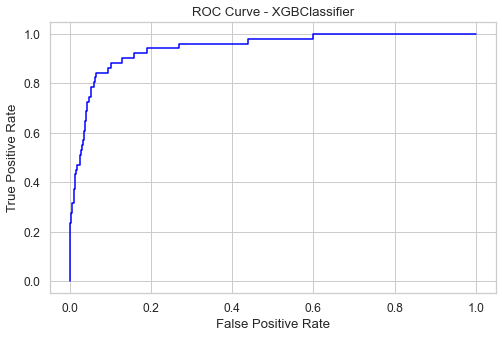

In [188]:
#define metrics
y_pred_proba = xgb_model.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, color="blue")
plt.title('ROC Curve - XGBClassifier')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

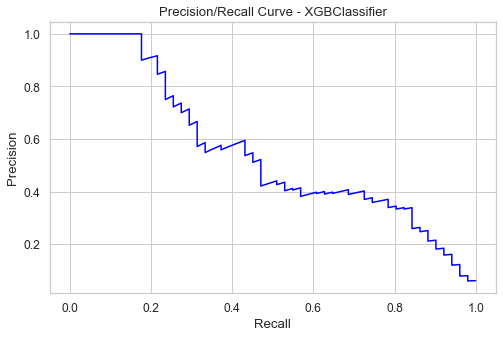

In [189]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='blue')

#add axis labels to plot
ax.set_title('Precision/Recall Curve - XGBClassifier')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [191]:
f_importances = pd.Series(np.round(xgb_model.feature_importances_,4),index=X_train.columns).sort_values(ascending=False)
f_importances

 After-tax net Interest Rate                                0.4501
 Continuous interest rate (after tax)                       0.1132
 Borrowing dependency                                       0.0450
 Total debt/Total net worth                                 0.0405
 Net Income to Stockholder's Equity                         0.0326
 Tax rate (A)                                               0.0184
 Per Share Net profit before tax (Yuan ¥)                   0.0175
 Net Income to Total Assets                                 0.0125
 Retained Earnings to Total Assets                          0.0113
 Regular Net Profit Growth Rate                             0.0109
 Operating Gross Margin                                     0.0093
 Current Assets/Total Assets                                0.0090
 Cash Flow to Equity                                        0.0090
 Total Asset Growth Rate                                    0.0080
 ROA(C) before interest and depreciation before interest    0.

# Extra Trees

In [192]:
%%time
# ExtraTreesClassifier hypertuning: n_estimators, max_depth, criterion, max_features
xtc_grid = {'n_estimators': [150, 200],
            'max_depth': [15,20],
            'criterion': ['entropy', 'gini'],
            'max_features': ['sqrt','log2']}
xtc_cv = GridSearchCV(ExtraTreesClassifier(random_state=42), 
            cv=kf, 
            param_grid=xtc_grid, 
            scoring='r2')
xtc_results = xtc_cv.fit(X_train, y_train)
print("XTC best score", xtc_results.best_score_)
print("XTC best params", xtc_results.best_params_)


XTC best score 0.9106186657134673
XTC best params {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}
Wall time: 3min 20s


In [193]:
%%time
xtc_n_estimators = xtc_results.best_params_['n_estimators']
xtc_max_depth = xtc_results.best_params_['max_depth']
xtc_criterion = xtc_results.best_params_['criterion']
xtc_max_features = xtc_results.best_params_['max_features']

score = cross_val_score(ExtraTreesClassifier(
            n_estimators=xtc_n_estimators, 
            max_depth=xtc_max_depth, 
            criterion=xtc_criterion, 
            max_features=xtc_max_features, 
            random_state=42),
            X_train, y_train, cv=kf)
print(f'Scores for each fold: {score}')
print("Accuracy: %0.4f (+/- %0.4f)" % (score.mean(), score.std() * 2))

Scores for each fold: [0.96597353 0.97258979 0.97540208 0.9820246  0.98107852 0.97918638
 0.98391675 0.98486282 0.97634816 0.97540208]
Accuracy: 0.9777 (+/- 0.0109)
Wall time: 17.4 s


In [194]:
%%time
xtc_model = ExtraTreesClassifier(
            n_estimators=xtc_n_estimators, 
            max_depth=xtc_max_depth, 
            criterion=xtc_criterion,
            max_features=xtc_max_features,
            random_state=42)
xtc_model.fit(X_train, y_train)
y_pred = xtc_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
print('confusion matrix:\n',cm)
print('accuracy score = ',accuracy_score(y_val,y_pred))
print("Classification Report:\n",classification_report(y_val,y_pred))

confusion matrix:
 [[1252   61]
 [  16   35]]
accuracy score =  0.9435483870967742
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1313
           1       0.36      0.69      0.48        51

    accuracy                           0.94      1364
   macro avg       0.68      0.82      0.72      1364
weighted avg       0.96      0.94      0.95      1364

Wall time: 1.92 s


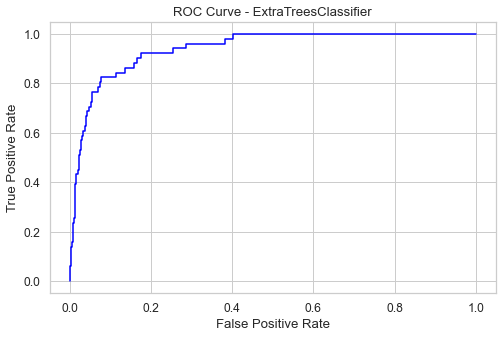

In [195]:
#define metrics
y_pred_proba = xtc_model.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, color="blue")
plt.title('ROC Curve - ExtraTreesClassifier')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

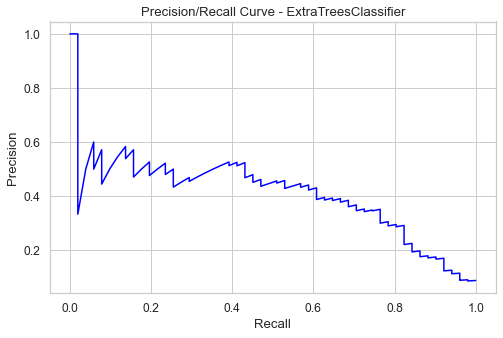

In [196]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='blue')

#add axis labels to plot
ax.set_title('Precision/Recall Curve - ExtraTreesClassifier')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [197]:
f_importances = pd.Series(np.round(xtc_model.feature_importances_,4),index=X_train.columns).sort_values(ascending=False)
f_importances

 Debt ratio %                                               0.0491
 Net worth/Assets                                           0.0474
 ROA(B) before interest and depreciation after tax          0.0399
 ROA(C) before interest and depreciation before interest    0.0373
 ROA(A) before interest and % after tax                     0.0368
 Net Income to Total Assets                                 0.0340
 Persistent EPS in the Last Four Seasons                    0.0271
 Current Liability to Assets                                0.0257
 Net profit before tax/Paid-in capital                      0.0257
 Retained Earnings to Total Assets                          0.0238
 Working Capital to Total Assets                            0.0235
 Borrowing dependency                                       0.0214
 Net Value Per Share (C)                                    0.0192
 Per Share Net profit before tax (Yuan ¥)                   0.0171
 Current Liabilities/Equity                                 0.

## Submission

## CONCLUSION

### Management/Research Question

**In layman’s terms, what is the management/research question of interest, and why would anyone care?**

Given the bankruptcy data from the Taiwan Economic Journal for the years 1999–2009, one would like to predict the potential of bankruptcy for a company. For a loan institution, they would want to be aware of the potential bankruptcy a company would have before issuing a loan of a significant amount. For the companies themselves, they can identify certain issues within themselves and see if they can improve that to lessen their chances for bankruptcy. For customers, they would like to be aware of a company's potential bankruptcy status to determine if they would consider or continuing doing business with them.

That being said, we need to take extreme care in creating a bankruptcy predictor, as it can have major ramifications to a company. This is soley an exploratory exercise for machine learning.